### LAB4 
Filippo Cucchetto (matr.2110510)

### Ex.1

a) what is the probability distribution of y, the number of times the new method fails to detect the
disease ?

We can assume that the probability distribution of the number of times that new method fails will be a binomial distrubtion.

b) On the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method ?

The frequentist estimator is just the rate between  
$$
\hat{p_{F}} = \frac{y}{n}
$$

In [1]:
y=6
n=75
x=n-y
P_F=y/n
cat("Frequentist estimation of the failure probability",P_F,"\n")

Frequentist estimation of the failure probability 0.08 


c) Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
the mean value and variance

We know that:
$$
m= \frac{a}{a+b}
$$

$$
\sigma^2_{0}=\frac{ab}{(a+b+1)(a+b)}
$$

From which we can retrieve that:
$$
a=m \cdot(\frac{m(1-m)}{\sigma^2_{0}}-1)
$$

$$
b= a\cdot \left( \frac{1}{m}-1 \right)
$$

In [2]:
X=seq(0,1,length.out = 10000)
m=0.15
sd=0.14
var=sd^2
a=m*(((1-m)*m)/(var)-1)
b=a*((1/m)-1)
A=a+y
B=a+n-y
M=A/(A+B)
V=(A*B)/(((A+B)^2)*(A+B+1))


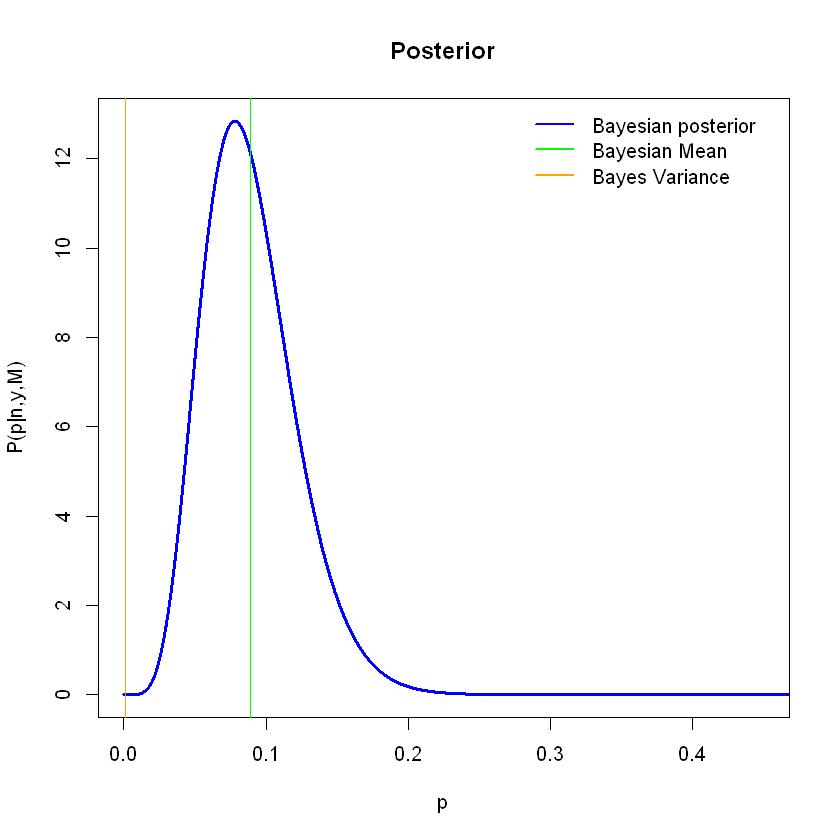

In [3]:
plot(X,dbeta(X,A,B),col="blue",type="l",lty=1,xlim=c(0,0.45),lwd = 3,xlab="p",ylab="P(p|n,y,M)",main="Posterior")
abline(v=M,col="green")
abline(v=V,col="orange")
legend(x = "topright",
       col = c("blue","green","orange"),
       lty = c(1,1),
       lwd = c(2,2),
       cex=1,
       bty="n",
       legend = c('Bayesian posterior ', "Bayesian Mean", "Bayes Variance"))

1.d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in
ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test
the sample at a 5% level of significance in the Bayesian way

We have that:
$$
H_{0}:  p_{0} \geq 0.15
$$
$$
H_{1}:  p_{0} < 0.15
$$

Therefore we integrate our posterior from 0 to $p_{0}$, take 1 minus this value and if this difference is less thatn 5% we reject the null Hypothesis and accept $ H_{1}$

In [4]:
H_0=1-integrate( function(x){dbeta(x,A,B)},0,0.15)$value
cat("Probability of p being less than 0.15:","\n",H_0,"\n")
if(H_0<0.05){
    cat("We reject the null Hypothesis","\n")
}


Probability of p being less than 0.15: 
 0.04475614 
We reject the null Hypothesis 


Since we rejected we can say that the new test is better than the standard one, with a 5% Bayesian significance

1.e)Perform the same hypothesis test in the classical frequentist way

We compute the  $ p_{value} $

In [5]:
z=dbinom(seq(0,5,by=1),75,15/100)
p_value=sum(z)
cat("The p_value is",p_value,"\n")

The p_value is 0.02342005 


Since the $ p_{value}$ is less than $\alpha $ we reject the null hypothesis $ H_{0}$ 

### EX2

a) find the posterior distribution, the posterior mean and standard deviation

In [6]:
X=sort(c(4.09,4.68,1.87,2.62,5.58,8.68,4.07,4.78,4.79,4.49,5.85,5.09,2.40,6.27,6.30,4.47))
sd=2
prior=function(x){
    
    if(0<x & x<3){
        return(x)}
    if(3<x & x<=8){
        return(3)}
    if(5<x & x <=8){
        return((8-x))}
    if(x>8){
        return(0)}
}
Likelihood=function(x,mu){
    return(prod(dnorm(x,mu,sd=2)))
}
dat=seq(1,9,by=0.01)
Lvec=sapply(dat,Likelihood,X)
PriorVec=Vectorize(prior)

Post=Lvec*unlist(PriorVec(dat))
NormPost=Post/integrate(function(x){sapply(x,Likelihood,X)*unlist(PriorVec(x))},0,Inf)$value


Warning message in Lvec * unlist(PriorVec(dat)):
"la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto"
Warning message in sapply(x, Likelihood, X) * unlist(PriorVec(x)):
"la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto"


In [7]:
PosteriorMean=weighted.mean(dat, NormPost)
Variance=weighted.mean(dat^2, NormPost)-PosteriorMean^2

In [8]:
cat("Posterior Mean",PosteriorMean,"\n")
cat("Standard Deviation",sqrt(Variance),"\n")

Posterior Mean 4.751894 
Standard Deviation 0.4999641 


2.b)find the 95% credibility interval for μ

In [9]:
z=qnorm(0.95,mean=PosteriorMean,sd=2)
CI=abs(z*Variance)
cat("Credibility Interval is",PosteriorMean ,"+/-",CI,"\n")

Credibility Interval is 4.751894 +/- 2.010112 


2.c) plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation,
and the 95% credibility interval

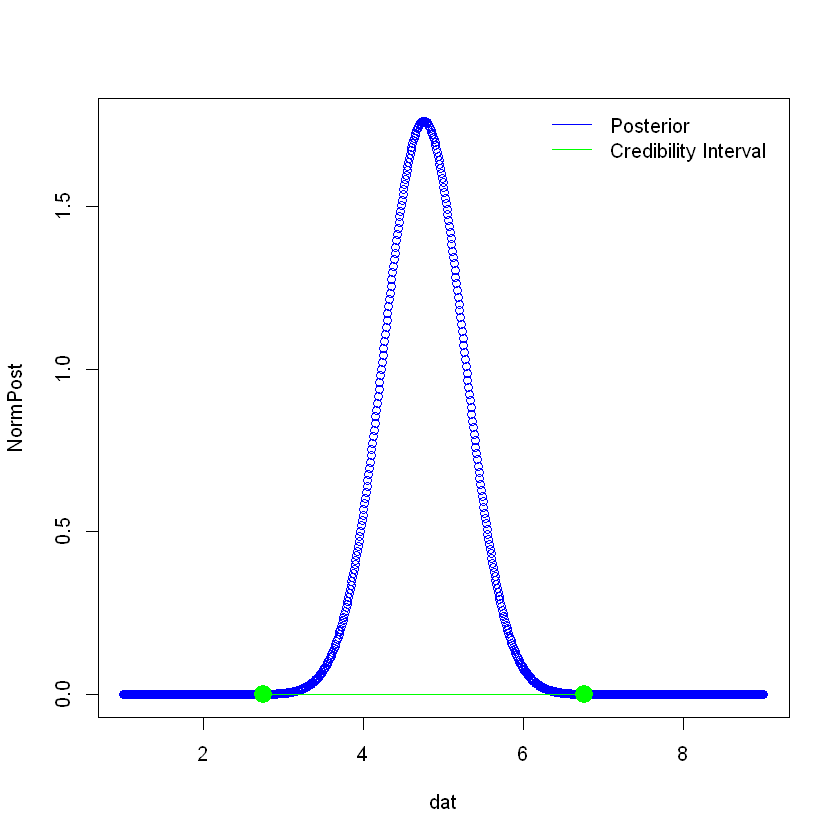

In [10]:
plot(dat,NormPost,col="Blue")
segments(x0=PosteriorMean-CI,y0=0,x1=PosteriorMean+CI,y1=0,col="green")
points(x=PosteriorMean-CI,y=0,cex=2,col="green",type="p",pch=19)
points(x=PosteriorMean+CI,y=0,cex=2,col="green",type="p",pch=19)
legend(x = "topright",
       col = c("blue","green"),   lty = c(1,1),       lwd = c(1,1),
       cex=1,
       bty="n",
       legend = c('Posterior ', 'Credibility Interval' ))

2.d)plot, on the same graph, the prior, the likelihood and the posterior distribution

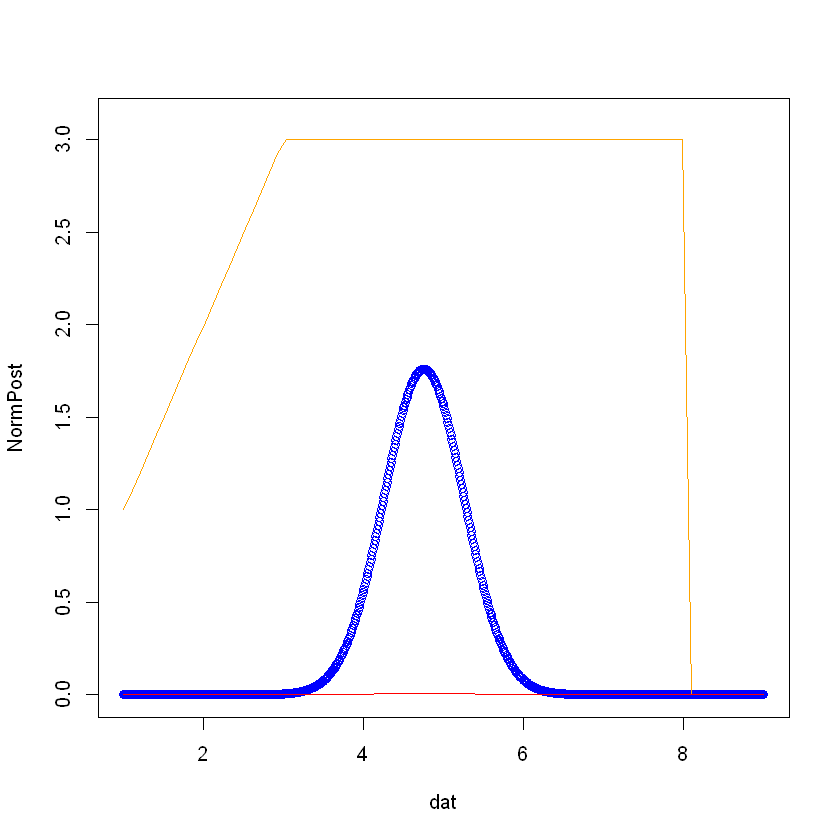

In [11]:
#plot(dat,unlist(PriorVec(dat)),col="orange")
x=seq(1,9,length.out=80)

plot(dat,NormPost,col="blue",ylim=c(0,3.1))
lines(x,unlist(sapply(x,prior)),col="orange",type="l")

lines(dat,Lvec/sum(Lvec),col="red")


### Exercise 3

In [18]:
set.seed(89540)
box0=list(0,0,0,0,0,0)
box1=list(1,0,0,0,0,0)
box2=list(1,1,0,0,0,0)
box3=list(1,1,1,0,0,0)
box4=list(1,1,1,1,0,0)
box5=list(1,1,1,1,1,0)
boxes=list(box0,box1,box2,box3,box4,box5)

In [19]:
 #number of iterations of the program
m=1 #chose how many stones to extract
P0=0
P1=0
P2=0
P3=0
P4=0
P5=0
n=10 
K=1000
listN=(0)
listP0=c(0.167)
listP1=c(0.167)
listP2=c(0.167)
listP3=c(0.167)
listP4=c(0.167)
listP5=c(0.167)
i=2
a=sample(1:6,1)
while(i<K){
    
    RandomBall=unlist(sample(unlist(boxes[a]),1,"True"))
    #update probability
    if(RandomBall==0)
    {
        listP0[i]=0
        listP1[i]=(2*(1/5)*unlist(listP1[i-1]))/sum(listP1)
        listP2[i]=2*(2/5)*unlist(listP2[i-1])/sum(listP2)
        listP3[i]=2*(3/5)*unlist(listP3[i-1])/sum(listP3)
        listP4[i]=2*(4/5)*unlist(listP4[i-1])/sum(listP4)
        listP5[i]=2*(5/5)*unlist(listP5[i-1])/sum(listP5)
    }
    else
    { 
        listP0[i]=2*(5/5)*unlist(listP1[i-1])/sum(listP0)
        listP1[i]=2*((5-1)/5)*unlist(listP1[i-1])/sum(listP1)
        listP2[i]=2*((5-2)/5)*unlist(listP2[i-1])/sum(listP2)
        listP3[i]=2*((5-3)/5)*unlist(listP3[i-1])/sum(listP3)
        listP4[i]=2*((5-4)/5)*unlist(listP4[i-1])/sum(listP4)
        listP5[i]=0
    }
    listN[i]=i
    i=i+1
}


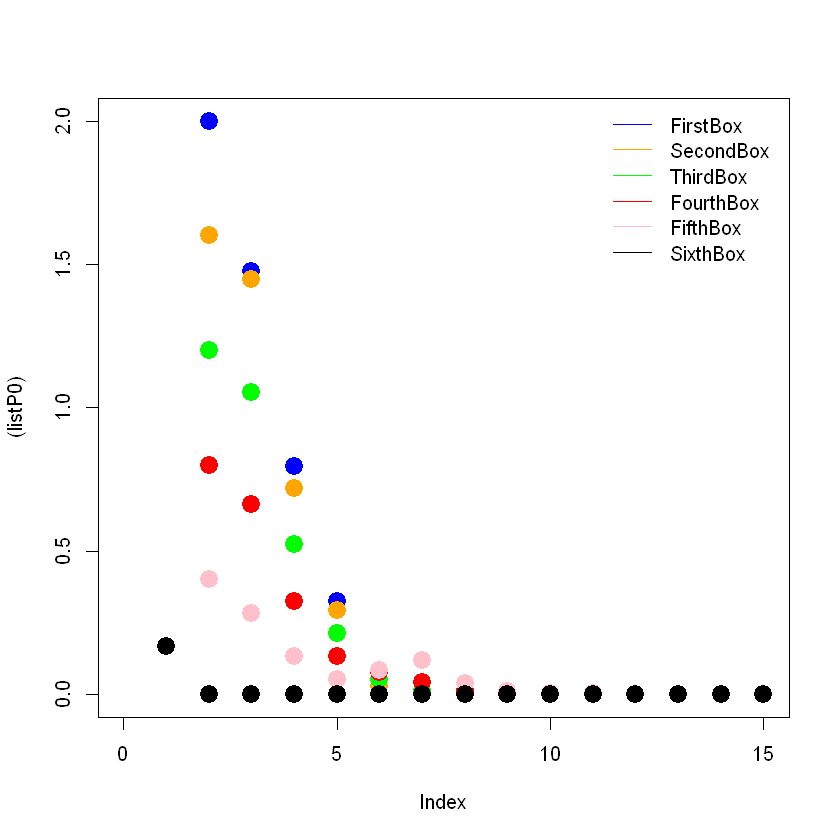

In [23]:
plot((listP0),xlim=c(0,15),col="blue",pch=19,cex=2)
points((listP1),col="orange",pch=19,cex=2)
points((listP2),col="green",pch=19,cex=2)
points((listP3),col="red",pch=19,cex=2)
points((listP4),col="pink",pch=19,cex=2)
points((listP5),col="black",pch=19,cex=2)
legend(x='topright', col = c("blue","orange","green","red","pink","black"),lty = c(1,1,1,1,1,1),lwd = c(1,1,1,1,1,1),cex=1,bty="n", legend = c('FirstBox ','SecondBox','ThirdBox','FourthBox','FifthBox','SixthBox'))

In [2]:
v1<-c(1,2,3)
l1<-list(1,2,3)
typeof(v1)

[1] "double"